Estimated Runtime: ~15 Minutes

Required Packages: numpy, pandas, matplotlib, sklearn

License: Removed

Author: Removed
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib as mpl
from sklearn.linear_model import Ridge
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import ResidualDecomposition as RD

np.random.seed(0)

In [2]:
data = pd.read_csv("Datasets/P_BostonHousing.csv") 
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [3]:
lr = Ridge()
lr.fit(X, Y)

t1 = time.time()

rshap_model = RD.ResidualDecompositionAsymmetric()
rshap_model.fit(X_train, X_test, Y_train, Y_test, lr, 1000)
rcomposition = rshap_model.get_composition()
rcontribution = rshap_model.get_contribution()

t2 = time.time()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [4]:
dshap = RD.Data_Shapley()
dshap.fit(X_train, X_test, Y_train, Y_test, mean_squared_error, lr, 1000)

iteration  25
iteration  50
iteration  75
iteration  100
iteration  125
iteration  150
iteration  175
iteration  200
iteration  225
iteration  250
iteration  275
iteration  300
iteration  325
iteration  350
iteration  375
iteration  400
iteration  425
iteration  450
iteration  475
iteration  500
iteration  525
iteration  550
iteration  575
iteration  600
iteration  625
iteration  650
iteration  675
iteration  700
iteration  725
iteration  750
iteration  775
iteration  800
iteration  825
iteration  850
iteration  875
iteration  900
iteration  925
iteration  950
iteration  975


In [5]:
dshapvals = dshap.shap_vals
rshapvals = rcomposition

In [6]:
lr.fit(X_train, Y_train)
sc = mean_squared_error(lr.predict(X_test), Y_test)

print(sc, np.sum(dshapvals))

23.765738803707965 23.885816085851108


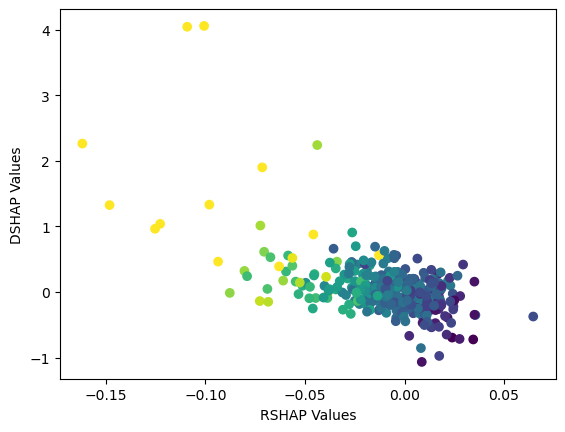

In [7]:
plt.xlabel("RSHAP Values")
plt.ylabel("DSHAP Values")

plt.scatter(np.mean(rcontribution, axis=1), dshapvals, c=Y_train)

In [8]:
# Removing the 'most' important instances

dshapscore1 = []
dshapscore2 = []
rshapscore1 = []
rshapscore2 = []
randomscore = []

dsorted = np.argsort(dshapvals)
dsortedr = np.argsort(dshapvals)[::-1]
rsorted = np.argsort(np.mean(rcontribution, axis=1))
rsortedr = np.argsort(np.mean(rcontribution, axis=1))[::-1]

for i in reversed(range(X_train.shape[0]//2, X_train.shape[0])):
    Xs = X_train[dsorted[:i]]
    Ys = Y_train[dsorted[:i]]
    
    lr.fit(Xs, Ys)
    dshapscore1.append(mean_squared_error(lr.predict(X_test), Y_test))
    
    Xs = X_train[dsortedr[:i]]
    Ys = Y_train[dsortedr[:i]]
    
    lr.fit(Xs, Ys)
    dshapscore2.append(mean_squared_error(lr.predict(X_test), Y_test))
    
    Xs = X_train[rsorted[:i]]
    Ys = Y_train[rsorted[:i]]
    
    lr.fit(Xs, Ys)
    rshapscore1.append(mean_squared_error(lr.predict(X_test), Y_test))
    
    Xs = X_train[rsortedr[:i]]
    Ys = Y_train[rsortedr[:i]]
    
    lr.fit(Xs, Ys)
    rshapscore2.append(mean_squared_error(lr.predict(X_test), Y_test))
    

In [9]:
randomscore = []
for j in range(0, 10):
    ranted = np.random.permutation(np.arange(0, X_train.shape[0]))
    
    tempscore = []
    for i in reversed(range(X_train.shape[0]//2, X_train.shape[0])):
        Xs = X_train[ranted[:i]]
        Ys = Y_train[ranted[:i]]

        lr.fit(Xs, Ys)
        tempscore.append(mean_squared_error(lr.predict(X_test), Y_test))
    randomscore.append(tempscore)
    print(j)

0
1
2
3
4
5
6
7
8
9


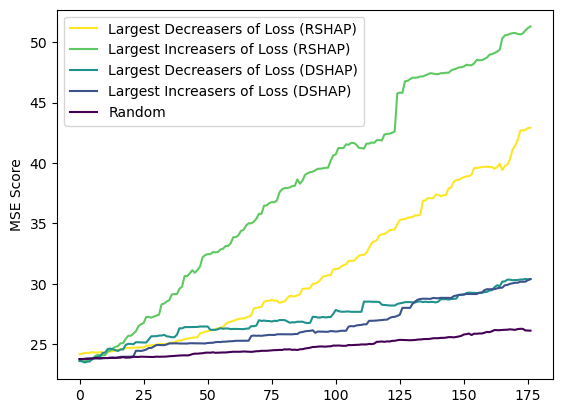

In [10]:
plt.ylabel("MSE Score")

plt.plot(rshapscore1, label='Largest Decreasers of Loss (RSHAP)', c="#fde725")
plt.plot(rshapscore2, label='Largest Increasers of Loss (RSHAP)', c="#5ec962")
plt.plot(dshapscore1, label='Largest Decreasers of Loss (DSHAP)', c="#21918c")
plt.plot(dshapscore2, label='Largest Increasers of Loss (DSHAP)', c="#3b528b")
plt.plot(np.mean(randomscore, axis=0), label='Random', c="#440154")

plt.legend()

In [11]:
# Removing the 'most' important instances

dshapscore1 = []
dshapscore2 = []
rshapscore1 = []
rshapscore2 = []

dsorted = np.argsort(np.abs(dshapvals))
dsortedr = np.argsort(np.abs(dshapvals))[::-1]
rsorted = np.argsort(np.mean(rcontribution ** 2, axis=1))
rsortedr = np.argsort(np.mean(rcontribution ** 2, axis=1))[::-1]

for i in reversed(range(X_train.shape[0]//2, X_train.shape[0])):
    Xs = X_train[dsorted[:i]]
    Ys = Y_train[dsorted[:i]]
    
    lr.fit(Xs, Ys)
    dshapscore1.append(mean_squared_error(lr.predict(X_test), Y_test))
    
    Xs = X_train[dsortedr[:i]]
    Ys = Y_train[dsortedr[:i]]
    
    lr.fit(Xs, Ys)
    dshapscore2.append(mean_squared_error(lr.predict(X_test), Y_test))
    
    Xs = X_train[rsorted[:i]]
    Ys = Y_train[rsorted[:i]]
    
    lr.fit(Xs, Ys)
    rshapscore1.append(mean_squared_error(lr.predict(X_test), Y_test))
    
    Xs = X_train[rsortedr[:i]]
    Ys = Y_train[rsortedr[:i]]
    
    lr.fit(Xs, Ys)
    rshapscore2.append(mean_squared_error(lr.predict(X_test), Y_test))



(0.0, 176.0)

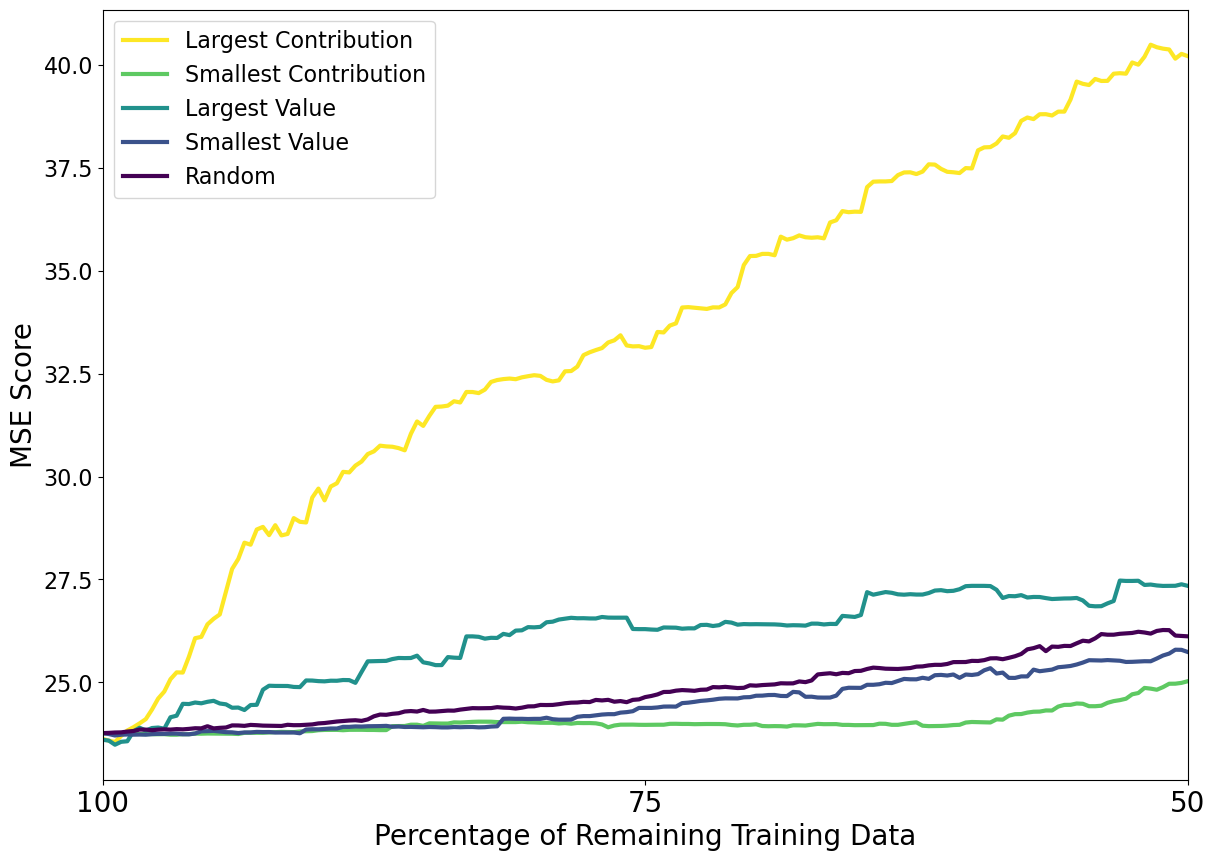

In [12]:
plt.figure(figsize=(14,10))

plt.plot(rshapscore1, label='Largest Contribution', c="#fde725", linewidth=3)
plt.plot(rshapscore2, label='Smallest Contribution', c="#5ec962", linewidth=3)
plt.plot(dshapscore1, label='Largest Value', c="#21918c", linewidth=3)
plt.plot(dshapscore2, label='Smallest Value', c="#3b528b", linewidth=3)
plt.plot(np.mean(randomscore, axis=0), label='Random', c="#440154", linewidth=3)

plt.legend(fontsize=16)
plt.xticks([0,X_train.shape[0]//2 - X_train.shape[0]//4, X_train.shape[0]//2], [100, 75, 50], fontsize=20)
plt.xlabel("Percentage of Remaining Training Data", fontsize=20)
plt.ylabel("MSE Score", fontsize=20)
plt.yticks(fontsize=16)

plt.savefig("Figures/boston_dshap_vs_rshap_ridge.pdf", bbox_inches='tight')

plt.xlim([0, X_train.shape[0]//2])

In [16]:
rpred = np.sum(rshapvals, axis=0)

r_contribution = ((rshapvals * -np.sign(rpred)))

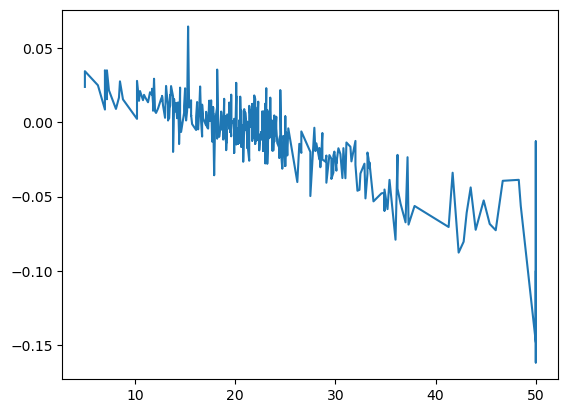

In [17]:
sY = np.argsort(Y_train)

plt.plot(Y_train[sY], np.mean(r_contribution, axis=1)[sY])

In [18]:
AA = (r_contribution @ r_contribution.T)

In [19]:
itotal_contributions = np.sum(np.abs(r_contribution), axis=1)

Text(0, 0.5, 'Total Contribution of instance')

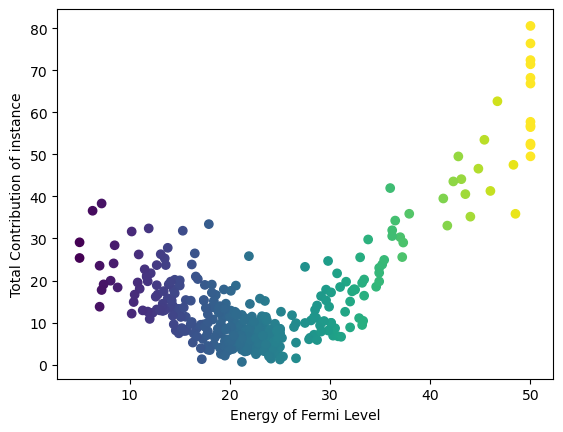

In [20]:
plt.scatter(Y_train, itotal_contributions, c=Y_train)

plt.xlabel("Energy of Fermi Level")
plt.ylabel("Total Contribution of instance")

In [22]:
itotal_composition = np.sum(np.abs(rshapvals), axis=0)

Text(0, 0.5, 'Total Composition of instance')

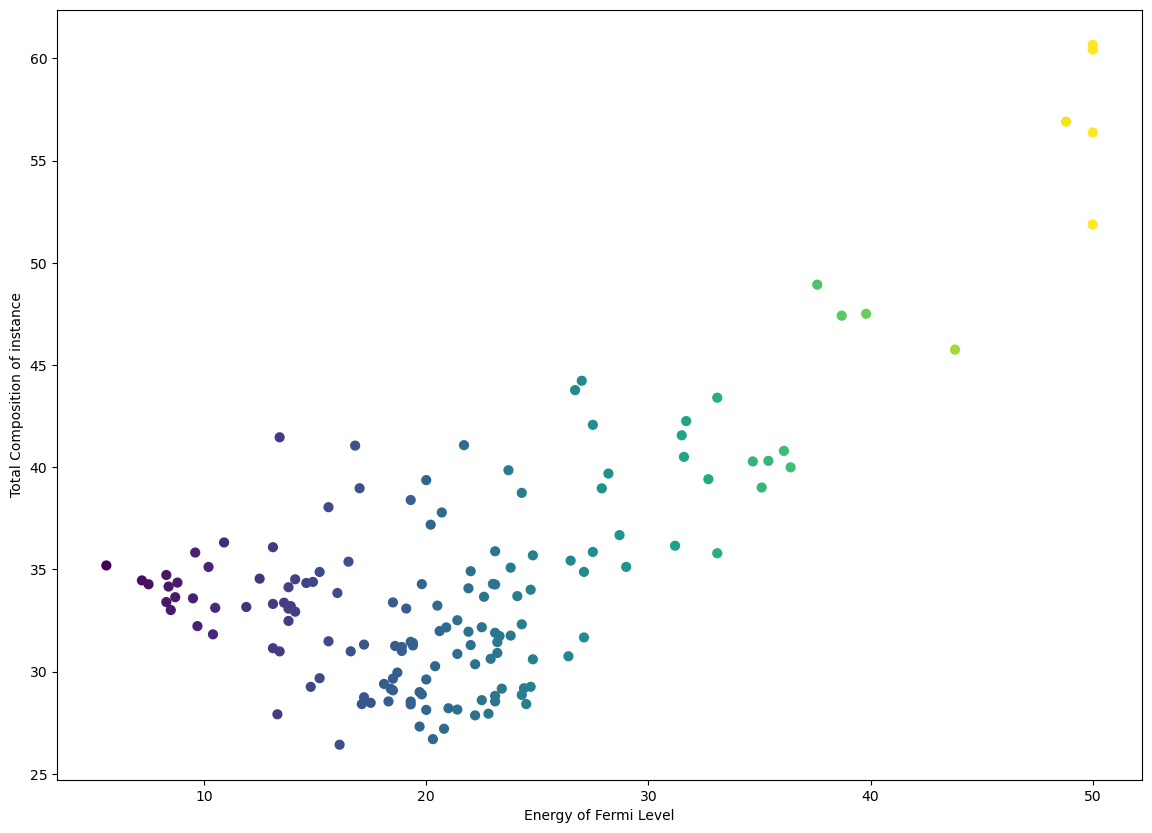

In [23]:
plt.figure(figsize=(14,10))

plt.scatter(Y_test, itotal_composition, c=Y_test, s=40)

plt.xlabel("Energy of Fermi Level")
plt.ylabel("Total Composition of instance")